# Exercices 5

[Télécharger l'exercice](../05_exercice.zip)

# Intrusion magmatique 

Le but de cet exercice est de modéliser deux intrusions magmatiques successives qui réchauffent la roche environnante en résolvant un problème de diffusion. Ce problème peut être simplifié en une dimension (1D) où la dimension $x$ représente la distance orthogonale aux intrusions.
 
![](./fig/dykes.png)

*Figure 1: Représentation des deux intrusions successives et la diffusion de leur chaleur dans la roche environnante.*

Les deux intrusions s'infiltrent l'une après l'autre à une profondeur d'environ 1 km, où la roche encaissante a une température de 30°C. La température initiale des intrusions est de 1000°C, et le magma commence à refroidir dès son arrivée à cet emplacement. La seconde intrusion s'infiltre 15 ans plus tard, à 30 m à droite de la première (mesurée entre leurs centres). La première intrusion a une épaisseur de 24 m, tandis que la seconde mesure 10 m d'épaisseur. La simulation débute immédiatement après la formation de la première intrusion. Aux deux extrémités (gauche et droite) de l'espace à modéliser, la roche est fracturée et traverse un flux d'eau important, maintenant ainsi une température constante de 30°C.

Pour résoudre ce problème, il faut discrétiser et implémenter les mêmes équations de diffusion thermique :

$$ q = -D \frac{\partial T}{dx}, \qquad (1) $$
$$ \frac{\partial T}{\partial t} = -\frac{\partial q}{\partial x}. \qquad (2) $$

Les paramètres physiques sont donnés dans la table suivante :

**Table: paramètres du modèle**

| **Paramètres**                | **Valeurs**         |
|-------------------------------|---------------------|
| Température ambiante          | 30°C                |
| Température de l'intrusion    | 1000°C              |
| Température limite gauche     | 30°C                |
| Température limite droite     | 30°C                |
| Centre de l'intrusion 1       | 80 m                |
| Centre de l'intrusion 2       | 110 m               |
| Épaisseur de l'intrusion 1    | 24 m                |
| Épaisseur de l'intrusion 2    | 10 m                |
| Intrusion de l'intrusion 2    | 15 ans              |
| Diffusivité de la roche       | 50 m²/yr            |
| Longueur du modèle            | 200 m               |

Écrire un code afin de répondre aux questions suivantes. Il s'agit d'écrire un code unique, avec un paramètre `Q` défini à `1` ou `2` pour traiter les questions 1 et 2.

**Q1 :** Après combien de temps une sonde positionnée 80 m à droite du centre de la première intrusion enregistrera une température de 100°C ? Stoppez votre code quand cette condition est remplie. 

**Q2 :** Changez les deux conditions de bords en supposant un flux nul de chaleur et refaites l'expérience. Analysez l'influence des conditions de bords sur le temps de passage de la sonde au-delà de 100°C.

### ✅ **À vous de faire !** 

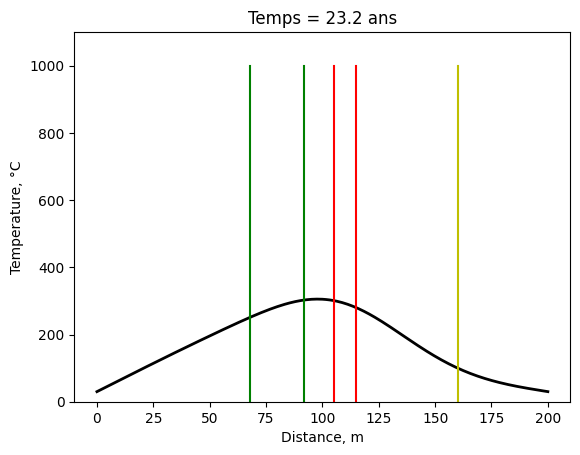

Le sonde positionnée 80 m à droite du centre de la première intrusion enregistre une température de 100°C à 23.2 ans


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Q = 1 # numero de la question

# Physical parameters
T_ir = 30.0           # Initial rock temperature, degC
T_id = 1000.0         # Initial intrusion temperature, degC
x_d1 = 80.0           # Position of intrusion 1, m
x_d2 = 110.0          # Position of intrusion 2, m
W_d1 = 24.0           # Width of intrusion 1, m
W_d2 = 10.0           # Width of intrusion 2, m
D    = 50.0           # Diffusivity, m2/yr
ttot = 100.0          # Total time, yr
t_d2 = 15.0           # Time of intrusion  2, yr
Lx = 200.0            # Total length, m
x_test = x_d1 + 80.0  # Position of temperature probe
T_thr = 100           # °C

# Numerical parameters
nx = 251                      # Number of coordinates
dx = Lx / (nx - 1)            # dx
x  = np.linspace(0, Lx, nx)   # Space coordinates
dt = dx**2 / (2.1 * D)        # Initial pas de temps
nt = int(ttot / dt)           # Number of pas de tempss
nout = 50                     # Tracerting intervalle

# Initialisation
T = np.ones(nx)*T_ir

# premiere intrusion magnatique
T[int((x_d1 - W_d1/2) / dx):int((x_d1 + W_d1/2) / dx)] = T_id

# Enable interactive mode
fig, ax = plt.subplots()

# Boucle temporelle
for it in range(nt):
    # discretisation de le équation et regle de mise à jour
    qx      = - D * (T[1:] - T[:-1]) / dx
    dTdt    = - (qx[1:] - qx[:-1]) / dx
    T[1:-1] += dt * dTdt
 
    # conditions de bords
    if Q==1:
        T[0]  = T_ir  
        T[-1] = T_ir  
    else:
        T[0]  = T[1]  
        T[-1] = T[-2] 

    # second intrusion magnatique
    if it == int(t_d2 / dt):
        T[int((x_d2 - W_d2/2) / dx):int((x_d2 + W_d2/2) / dx)] = T_id

    # plotting
    if it % nout == 0:
        clear_output(wait=True)  # Clear the output in VS Code
        ax.cla()
        ax.plot(x, T, linewidth=2,c='k')
        ax.plot([x_d1 - W_d1/2, x_d1 - W_d1/2], [0, 1000], 'g', 
                 [x_d1 + W_d1/2, x_d1 + W_d1/2], [0, 1000], 'g')
        ax.plot([x_d2 - W_d2/2, x_d2 - W_d2/2], [0, 1000], 'r', 
                 [x_d2 + W_d2/2, x_d2 + W_d2/2], [0, 1000], 'r')
        ax.plot([x_test, x_test], [0, 1000], 'y')
        ax.set_title("Temps = " + str(round(it * dt * 10) / 10) + " ans")
        ax.set_ylabel("Temperature, °C")
        ax.set_xlabel("Distance, m")
        ax.set_ylim([0, 1100])
        display(fig)
        plt.pause(0.1)  # Pause to actualiser the tracer

    # condition de sortie
    if T[int(x_test / dx)] >= T_thr:
        break

# print resultat
print("Le sonde positionnée 80 m à droite du centre de la première intrusion enregistre une température de 100°C à " + "{:.1f}".format(it*dt) + " ans")
